In [1]:
# 📦 Load required packages
library(DESeq2)
library(ggplot2)
library(dplyr)


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: generics


Attaching package: ‘generics’


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, saveRDS, table, tapply, unique,
    unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The follo

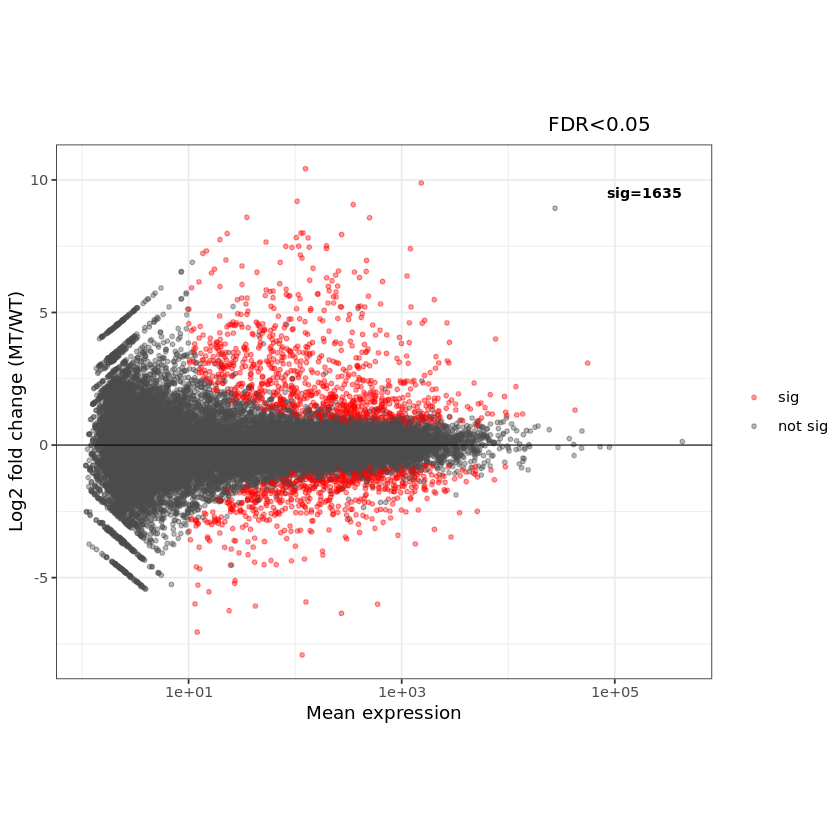

In [4]:
# 📥 Load DESeq2 object
dds <- readRDS("/home/layanomics/CrispAstro-Seq/04_differential_expression/results/dds.rds")

# 📊 Extract results for R270X vs WT
res_df <- as.data.frame(results(dds, contrast = c("condition", "R270X", "WT")))

# 🧪 Optional filtering to match paper: only consider padj < 0.05 + baseMean > 12.3
res_df$signif <- factor(
    ifelse(is.na(res_df$padj), "not sig",
        ifelse(res_df$padj < 0.05 & res_df$baseMean > 10, "sig", "not sig")
    ),
    levels = c("sig", "not sig")
)

# 🖼️ Create the MA plot with ggplot2
ggplot(res_df, aes(x = baseMean, y = log2FoldChange)) +
    geom_point(aes(color = signif), alpha = 0.4, size = 1) +
    scale_x_log10() +
    scale_color_manual(values = c("sig" = "red", "not sig" = "gray30")) +
    geom_hline(yintercept = 0, color = "black", lwd = 0.3) +
    annotate("text",
        x = max(res_df$baseMean, na.rm = TRUE), y = 9.5,
        label = paste0("sig=", sum(res_df$signif == "sig", na.rm = TRUE)),
        hjust = 1, size = 3, fontface = "bold"
    ) +
    theme_bw() +
    labs(
        x = "Mean expression",
        y = "Log2 fold change (MT/WT)",
        title = "FDR<0.05",
        color = NULL
    ) +
    theme(
        aspect.ratio = 0.815,
        legend.position = "right",
        plot.title = element_text(hjust = 0.75, face = "plain", size = 12),
        plot.title.position = "plot"
    )


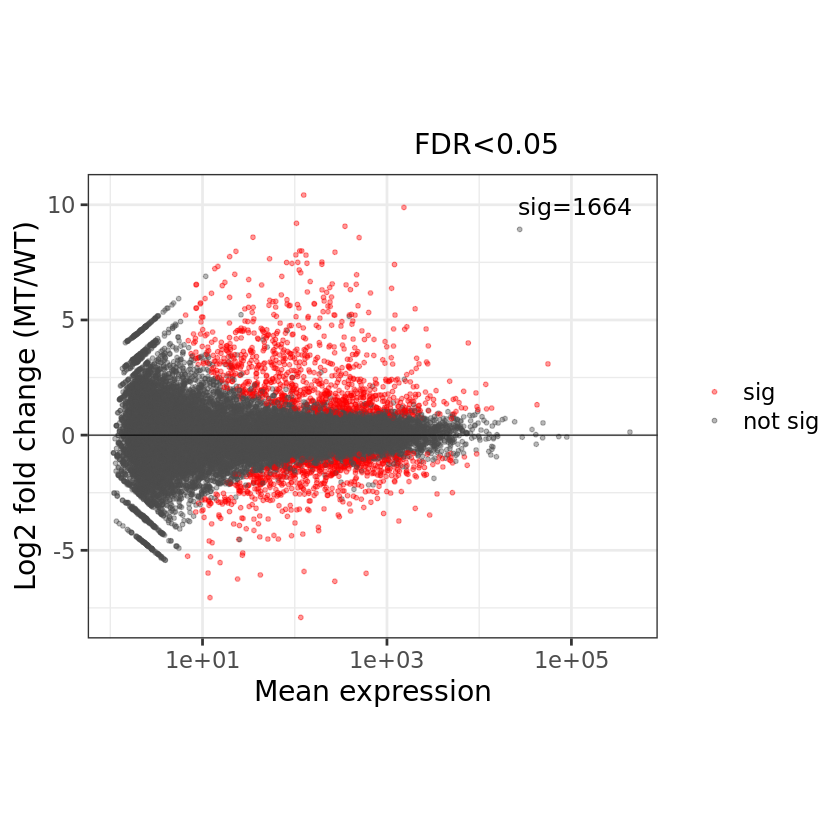

In [16]:
# 📥 Load DESeq2 object
dds <- readRDS("/home/layanomics/CrispAstro-Seq/04_differential_expression/results/dds.rds")

# 📊 Extract results for R270X vs WT
res_df <- as.data.frame(results(dds, contrast = c("condition", "R270X", "WT")))

# 🧪 Apply filtering to match paper:
# padj < 0.05 AND |log2FoldChange| > log2(1.5) ≈ 0.5849625
res_df$signif <- factor(
    ifelse(is.na(res_df$padj), "not sig",
        ifelse(res_df$padj < 0.05 & abs(res_df$log2FoldChange) > 0.5849625, "sig", "not sig")
    ),
    levels = c("sig", "not sig")
)

# 🖼️ Create the MA plot with ggplot2
ggplot(res_df, aes(x = baseMean, y = log2FoldChange)) +
    geom_point(aes(color = signif), alpha = 0.4, size = 1) +
    scale_x_log10() +
    scale_color_manual(values = c("sig" = "red", "not sig" = "gray30")) +
    geom_hline(yintercept = 0, color = "black", lwd = 0.3) +
    annotate("text",
        x = max(res_df$baseMean, na.rm = TRUE) * 1.05, # push it further right
        y = 10.3, # closer to top border
        label = paste0("sig=", sum(res_df$signif == "sig", na.rm = TRUE)),
        hjust = 1, vjust = 1, size = 5, fontface = "plain" # bigger font (size = 4)
    ) +
    theme_bw(base_size = 17) +
    labs(
        x = "Mean expression",
        y = "Log2 fold change (MT/WT)",
        title = "FDR<0.05",
        color = NULL
    ) +
    theme(
        aspect.ratio = 0.815,
        legend.position = "right",
        plot.title = element_text(hjust = 0.6, face = "plain", size = 17),
        plot.title.position = "plot"
    )
